# Deep Learning - Titanic Test Data

In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn import model_selection
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [3]:

titanic = pd.read_csv('/home/bhanuchander/course/Learn_MachineLearning/data/csv/titanic/train.csv')

nominal_cols = ['Embarked','Pclass', 'Sex', 'Parch', 'Cabin']

titanic['Embarked'].fillna('Unknown', inplace=True)

titanic['Cabin'].fillna('Unknown', inplace=True)

titanic['Age'].fillna(0, inplace=True)

con_titanic = titanic[['Age', 'SibSp', 'Fare', 'Pclass']]

## Binning Method to categorize the Continous Variables

def binning(col, cut_points, labels=None):

  minval = col.min()
  maxval = col.max()

  break_points = [minval] + cut_points + [maxval]


  if not labels:
    labels = range(len(cut_points)+1)


  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

cut_points = [1, 10, 20, 40, 60 ]

labels = ["Unknown", "Child", "Teen", "Adult", "Aged", "Old"]

con_titanic['Age'] = binning(con_titanic['Age'], cut_points, labels)


titanic['Embarked'].fillna('Unknown', inplace=True)

con_titanic[nominal_cols] = titanic[nominal_cols].astype('category')

cat_columns = con_titanic.select_dtypes(['category']).columns

con_titanic[cat_columns]= con_titanic[cat_columns].apply(lambda x: x.cat.codes)


print con_titanic.head()

   Age  SibSp     Fare  Pclass  Embarked  Sex  Parch  Cabin
0    3      1   7.2500       2         2    1      0    147
1    3      1  71.2833       0         0    0      0     81
2    3      0   7.9250       2         2    0      0    147
3    3      1  53.1000       0         2    0      0     55
4    3      0   8.0500       2         2    1      0    147


# Normalizing the Data frame

In [4]:
# Normalizing

from sklearn import preprocessing

x = con_titanic.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
con_titanic = pd.DataFrame(x_scaled, columns=list(con_titanic))

print con_titanic.head()

   Age  SibSp      Fare  Pclass  Embarked  Sex  Parch    Cabin
0  0.6  0.125  0.014151     1.0  0.666667  1.0    0.0  1.00000
1  0.6  0.125  0.139136     0.0  0.000000  0.0    0.0  0.55102
2  0.6  0.000  0.015469     1.0  0.666667  0.0    0.0  1.00000
3  0.6  0.125  0.103644     0.0  0.666667  0.0    0.0  0.37415
4  0.6  0.000  0.015713     1.0  0.666667  1.0    0.0  1.00000


# Test-Train Split

In [5]:
Y = titanic['Survived']

X = con_titanic

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.2, random_state=9)


# Deep Learning Module Configuration

In [6]:
# create the model
model = Sequential()
model.add(Dense(8, input_dim=8, init='uniform', activation='sigmoid'))
model.add(Dense(6, init='uniform', activation='sigmoid'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

# Module Summary

In [7]:
print model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________
None


# Here I am testing with this module with Various Optimizers Such as

- adam
- rmsprop

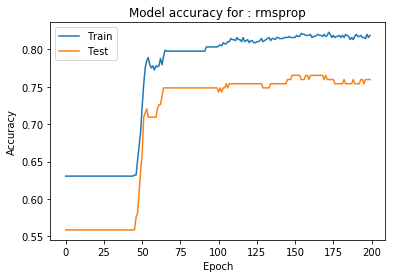

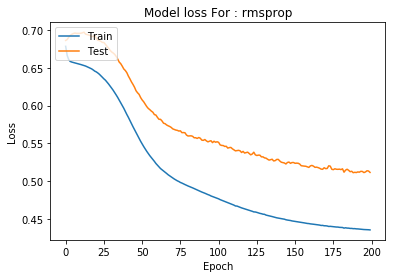

179/179 [==============================] - 0s 18us/step
Optimizer : rmsprop Accuracy: 75.98%


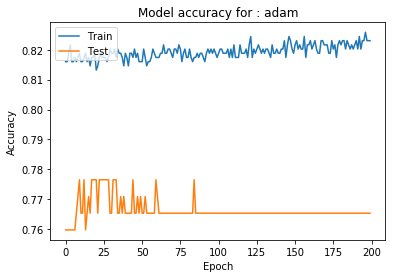

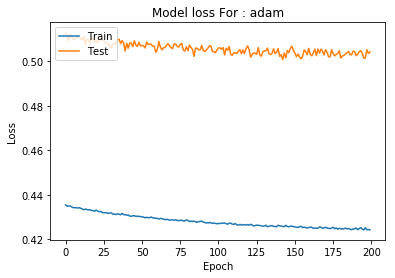

179/179 [==============================] - 0s 28us/step
Optimizer : adam Accuracy: 76.54%


In [8]:

# compile the model
opt = ['rmsprop', 'adam']

for op in opt:
  model.compile(loss='binary_crossentropy', optimizer=op, metrics=['accuracy'])


  history = model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), nb_epoch=200, batch_size= con_titanic.shape[0]/100, verbose=0)

  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy for : '+op)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss For : '+op)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # evaluate the model
  scores = model.evaluate(X_validation, Y_validation)
  print "Optimizer : %s"% op + " Accuracy: %.2f%%" % (scores[1]*100)